In [2]:
# Exercise 1 Types
import pandas as pd 

df = pd.read_csv("/Users/patash/PSTB/Week_4/day_4_RNN/household_power_consumption.txt", sep=";")  
print(df.head())

# The dataset for energy consumption prediction. 

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


/var/folders/0x/ld7nmr854gg9f09bct0w9drh0000gn/T/ipykernel_93527/4028031103.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/patash/PSTB/Week_4/day_4_RNN/household_power_consumption.txt", sep=";")


In [3]:
df.shape

(2075259, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
# Types 
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")  
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time  
 
cols_to_convert = [
    "Global_active_power", "Global_reactive_power", "Voltage",
    "Global_intensity", "Sub_metering_1", "Sub_metering_2"
]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

print(df.dtypes)


Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


In [6]:
# df_sorted

df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('Datetime', inplace=True)

df_sorted = df.sort_index()
print(df_sorted.head())

                          Date      Time  Global_active_power  \
Datetime                                                        
2006-12-16 17:24:00 2006-12-16  17:24:00                4.216   
2006-12-16 17:25:00 2006-12-16  17:25:00                5.360   
2006-12-16 17:26:00 2006-12-16  17:26:00                5.374   
2006-12-16 17:27:00 2006-12-16  17:27:00                5.388   
2006-12-16 17:28:00 2006-12-16  17:28:00                3.666   

                     Global_reactive_power  Voltage  Global_intensity  \
Datetime                                                                
2006-12-16 17:24:00                  0.418   234.84              18.4   
2006-12-16 17:25:00                  0.436   233.63              23.0   
2006-12-16 17:26:00                  0.498   233.29              23.0   
2006-12-16 17:27:00                  0.502   233.74              23.0   
2006-12-16 17:28:00                  0.528   235.68              15.8   

                     Sub_meterin

In [7]:
print(df_sorted.tail())

# dataset from 16/12/2006 (17:24) to 26/11/2010 (21:02), with data recorded every minute.

                          Date      Time  Global_active_power  \
Datetime                                                        
2010-11-26 20:58:00 2010-11-26  20:58:00                0.946   
2010-11-26 20:59:00 2010-11-26  20:59:00                0.944   
2010-11-26 21:00:00 2010-11-26  21:00:00                0.938   
2010-11-26 21:01:00 2010-11-26  21:01:00                0.934   
2010-11-26 21:02:00 2010-11-26  21:02:00                0.932   

                     Global_reactive_power  Voltage  Global_intensity  \
Datetime                                                                
2010-11-26 20:58:00                    0.0   240.43               4.0   
2010-11-26 20:59:00                    0.0   240.00               4.0   
2010-11-26 21:00:00                    0.0   239.82               3.8   
2010-11-26 21:01:00                    0.0   239.70               3.8   
2010-11-26 21:02:00                    0.0   239.55               3.8   

                     Sub_meterin

In [8]:
# Exercise 2 Missing values

missing_values = df_sorted.isna().sum()
print(missing_values[missing_values > 0]) 

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [9]:
df_sorted.fillna(df.mean(numeric_only=True), inplace=True)
print(df_sorted.isna().sum().sum()) 

0


In [10]:
# Exercise 3 Visualization
import matplotlib.pyplot as plt
print(df_sorted.index.dtype)

# Sum & Mean 'Global_active_power' 
daily_sum = df_sorted['Global_active_power'].resample('D').sum()
daily_mean = df_sorted['Global_active_power'].resample('D').mean()
print(daily_sum)
print(daily_mean)

datetime64[ns]
Datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2010-11-22    2041.536
2010-11-23    1577.536
2010-11-24    1796.248
2010-11-25    1431.164
2010-11-26    1488.104
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64
Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64


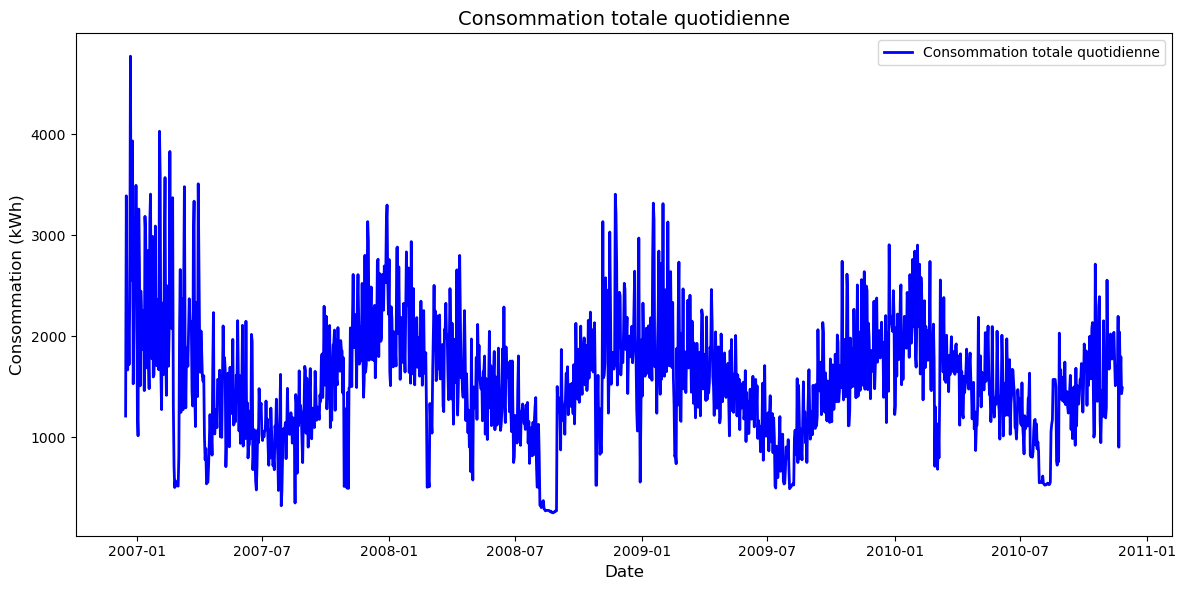

In [11]:
# Plot Sum 'Global_active_power' 
plt.figure(figsize=(12, 6))

plt.plot(daily_sum, label='Consommation totale quotidienne', color='blue', linestyle='-', linewidth=2)

plt.title("Consommation totale quotidienne", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consommation (kWh)", fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

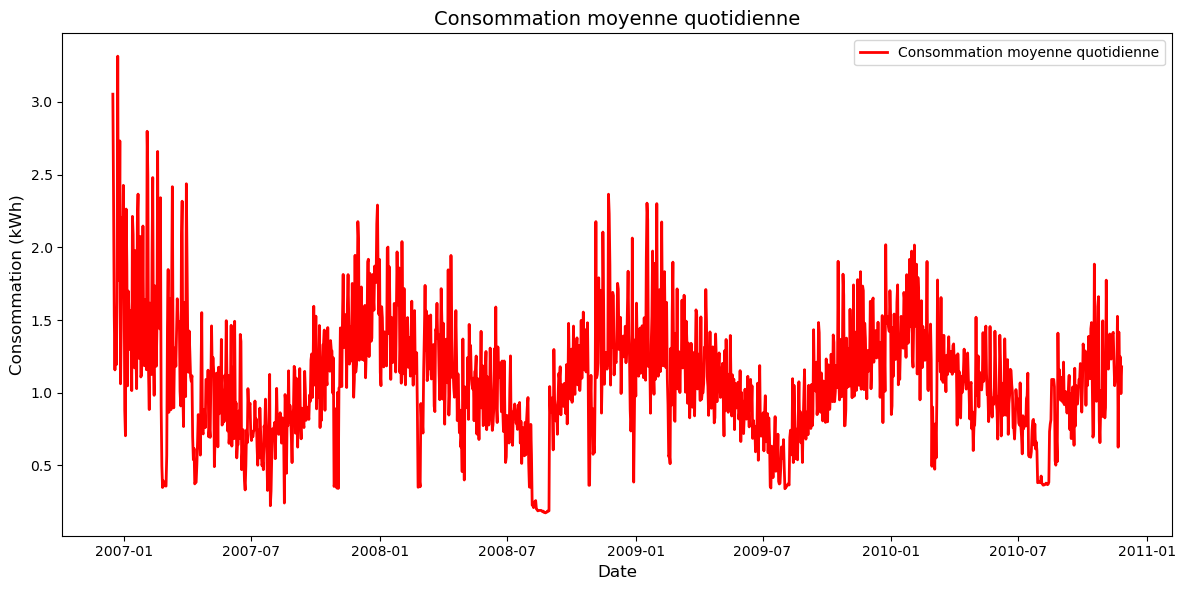

In [12]:
# Plot Mean 'Global_active_power' 
plt.figure(figsize=(12, 6))

plt.plot(daily_mean, label='Consommation moyenne quotidienne', color='red', linestyle='-', linewidth=2)

plt.title("Consommation moyenne quotidienne", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consommation (kWh)", fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Visualization Mean & Std 'Global_intensity'

daily_mean_intensity = df_sorted['Global_intensity'].resample('D').mean()
daily_std_intensity = df_sorted['Global_intensity'].resample('D').std()

print(daily_mean_intensity)
print(daily_std_intensity)

Datetime
2006-12-16    13.082828
2006-12-17     9.999028
2006-12-18     6.421667
2006-12-19     4.926389
2006-12-20     6.467361
                ...    
2010-11-22     6.014167
2010-11-23     4.674444
2010-11-24     5.249583
2010-11-25     4.169444
2010-11-26     4.956295
Freq: D, Name: Global_intensity, Length: 1442, dtype: float64
Datetime
2006-12-16    4.283262
2006-12-17    5.031445
2006-12-18    4.248511
2006-12-19    5.238010
2006-12-20    5.556587
                ...   
2010-11-22    5.040767
2010-11-23    3.744162
2010-11-24    3.741719
2010-11-25    3.476934
2010-11-26    3.552877
Freq: D, Name: Global_intensity, Length: 1442, dtype: float64


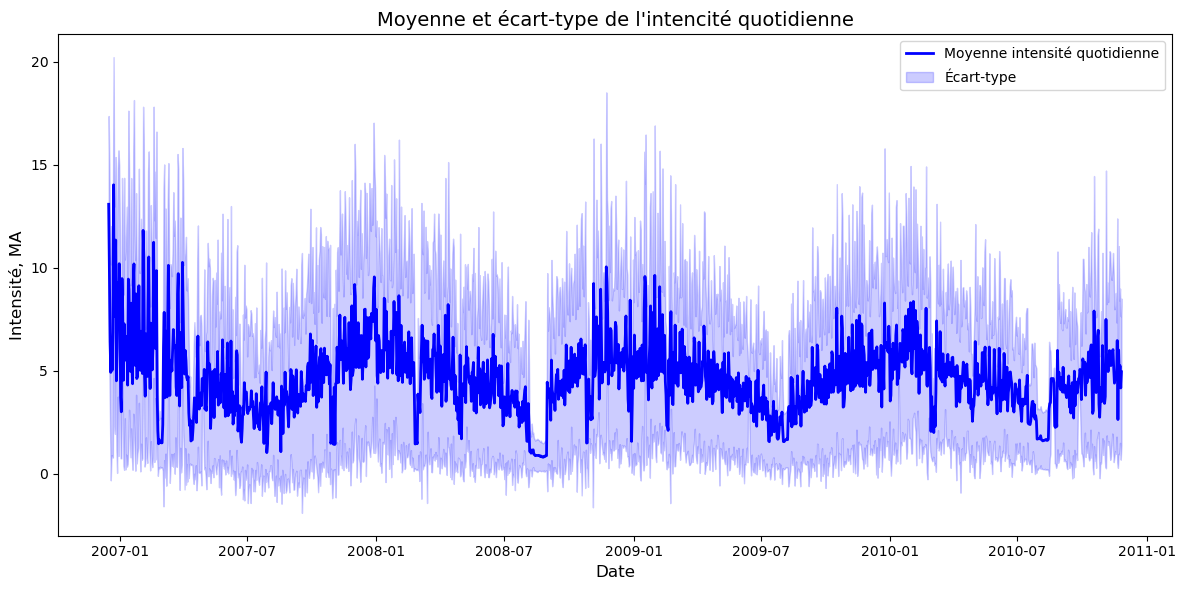

In [14]:
# Plot Mean & Std 'Global_intensity'
plt.figure(figsize=(12, 6))

plt.plot(daily_mean_intensity, label='Moyenne intensité quotidienne', color='blue', linestyle='-', linewidth=2)
upper_bound = daily_mean_intensity + daily_std_intensity
lower_bound = daily_mean_intensity - daily_std_intensity

# Mean ± std
plt.fill_between(daily_mean_intensity.index, lower_bound, upper_bound, color='blue', alpha=0.2, label="Écart-type")

plt.title("Moyenne et écart-type de l'intencité quotidienne", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Intensité, MA", fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# Exercise 4 Data Preprocessing For LSTM

# Normalisation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df_sorted[['Global_active_power', 'Global_reactive_power', 'Voltage', 
           'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = \
    scaler.fit_transform(df_sorted[['Global_active_power', 'Global_reactive_power', 'Voltage', 
                                     'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])

print(df_sorted.head())

                          Date      Time  Global_active_power  \
Datetime                                                        
2006-12-16 17:24:00 2006-12-16  17:24:00             0.374796   
2006-12-16 17:25:00 2006-12-16  17:25:00             0.478363   
2006-12-16 17:26:00 2006-12-16  17:26:00             0.479631   
2006-12-16 17:27:00 2006-12-16  17:27:00             0.480898   
2006-12-16 17:28:00 2006-12-16  17:28:00             0.325005   

                     Global_reactive_power   Voltage  Global_intensity  \
Datetime                                                                 
2006-12-16 17:24:00               0.300719  0.376090          0.377593   
2006-12-16 17:25:00               0.313669  0.336995          0.473029   
2006-12-16 17:26:00               0.358273  0.326010          0.473029   
2006-12-16 17:27:00               0.361151  0.340549          0.473029   
2006-12-16 17:28:00               0.379856  0.403231          0.323651   

                     Sub_

In [16]:
# Exercise 5

# Split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_sorted, test_size=0.2, shuffle=False)

print(f"Taille de l'ensemble d'entraînement: {len(df_train)}")
print(f"Taille de l'ensemble de test: {len(df_test)}")

Taille de l'ensemble d'entraînement: 1660207
Taille de l'ensemble de test: 415052


In [17]:
print(df_train.head())

                          Date      Time  Global_active_power  \
Datetime                                                        
2006-12-16 17:24:00 2006-12-16  17:24:00             0.374796   
2006-12-16 17:25:00 2006-12-16  17:25:00             0.478363   
2006-12-16 17:26:00 2006-12-16  17:26:00             0.479631   
2006-12-16 17:27:00 2006-12-16  17:27:00             0.480898   
2006-12-16 17:28:00 2006-12-16  17:28:00             0.325005   

                     Global_reactive_power   Voltage  Global_intensity  \
Datetime                                                                 
2006-12-16 17:24:00               0.300719  0.376090          0.377593   
2006-12-16 17:25:00               0.313669  0.336995          0.473029   
2006-12-16 17:26:00               0.358273  0.326010          0.473029   
2006-12-16 17:27:00               0.361151  0.340549          0.473029   
2006-12-16 17:28:00               0.379856  0.403231          0.323651   

                     Sub_

In [18]:
print(df_test.head())

                          Date      Time  Global_active_power  \
Datetime                                                        
2010-02-11 15:31:00 2010-02-11  15:31:00             0.023538   
2010-02-11 15:32:00 2010-02-11  15:32:00             0.023357   
2010-02-11 15:33:00 2010-02-11  15:33:00             0.023357   
2010-02-11 15:34:00 2010-02-11  15:34:00             0.023538   
2010-02-11 15:35:00 2010-02-11  15:35:00             0.023357   

                     Global_reactive_power   Voltage  Global_intensity  \
Datetime                                                                 
2010-02-11 15:31:00               0.073381  0.868821          0.024896   
2010-02-11 15:32:00               0.073381  0.861712          0.024896   
2010-02-11 15:33:00               0.071942  0.859128          0.024896   
2010-02-11 15:34:00               0.071942  0.861712          0.024896   
2010-02-11 15:35:00               0.070504  0.810339          0.024896   

                     Sub_

In [ ]:
# Energy consumption prediction (1440 min = 1 day)
import numpy as np

time_steps = 1440 
X_train = []
y_train = []

for i in range(time_steps, len(df_train)):
    X_train.append(df_train['Global_active_power'].iloc[i-time_steps:i].values)  
    y_train.append(df_train['Global_active_power'].iloc[i])  

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping X_train forLSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("X_train shape:", X_train.shape)  # (nb_samples, time_steps, nb_features)
print("y_train shape:", y_train.shape)  # (nb_samples,)

X_train shape: (1658767, 1440, 1)
y_train shape: (1658767,)


: 

In [ ]:
# Exercise 5 Building An LSTM Model
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM, Dropout
from keras.optimizers import RMSprop
import math
from sklearn.metrics import mean_squared_error

regressor = Sequential()

regressor.add(Input(shape=(X_train.shape[1], 1)))  

# First LSTM layer with Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# Training the model
regressor.fit(X_train, y_train, epochs=5, batch_size=32)
